<a href="https://colab.research.google.com/github/Jayameena832/Self_project/blob/main/Future_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
data = pd.read_csv("/content/Future_Sales.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
#Checking for any null value in the dataset
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


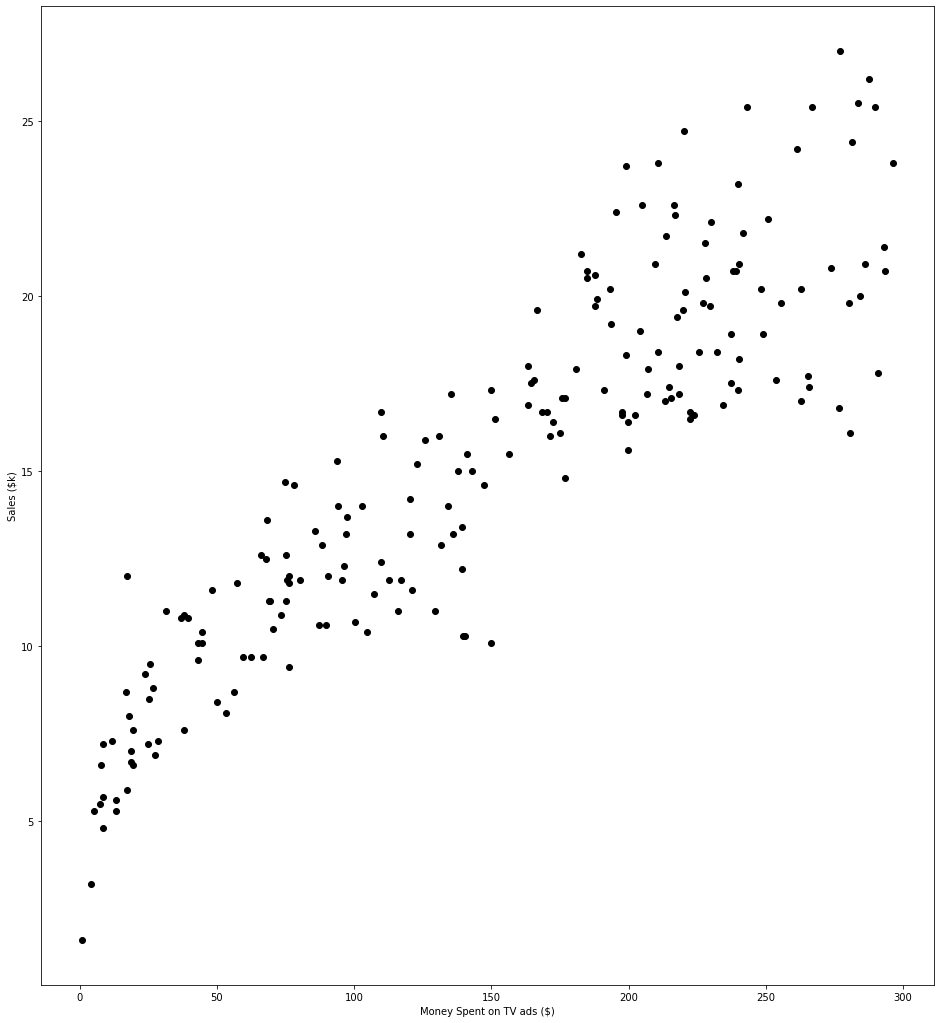

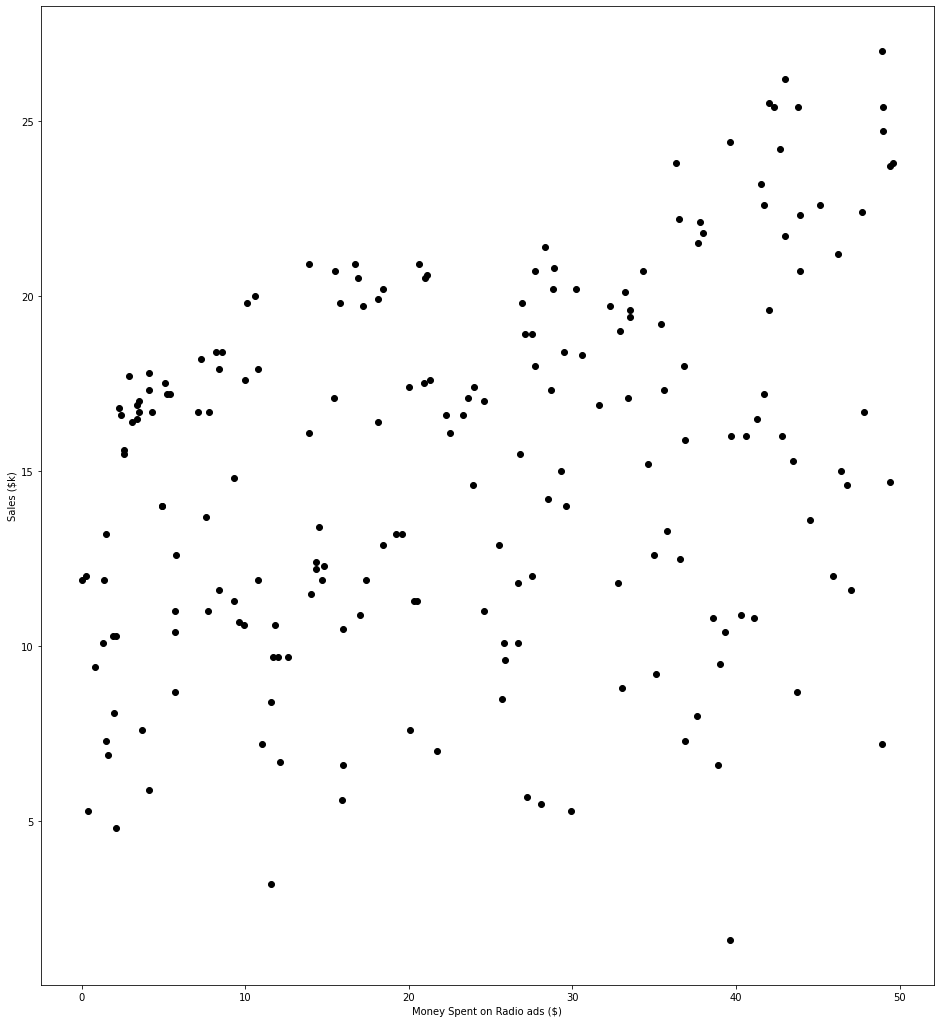

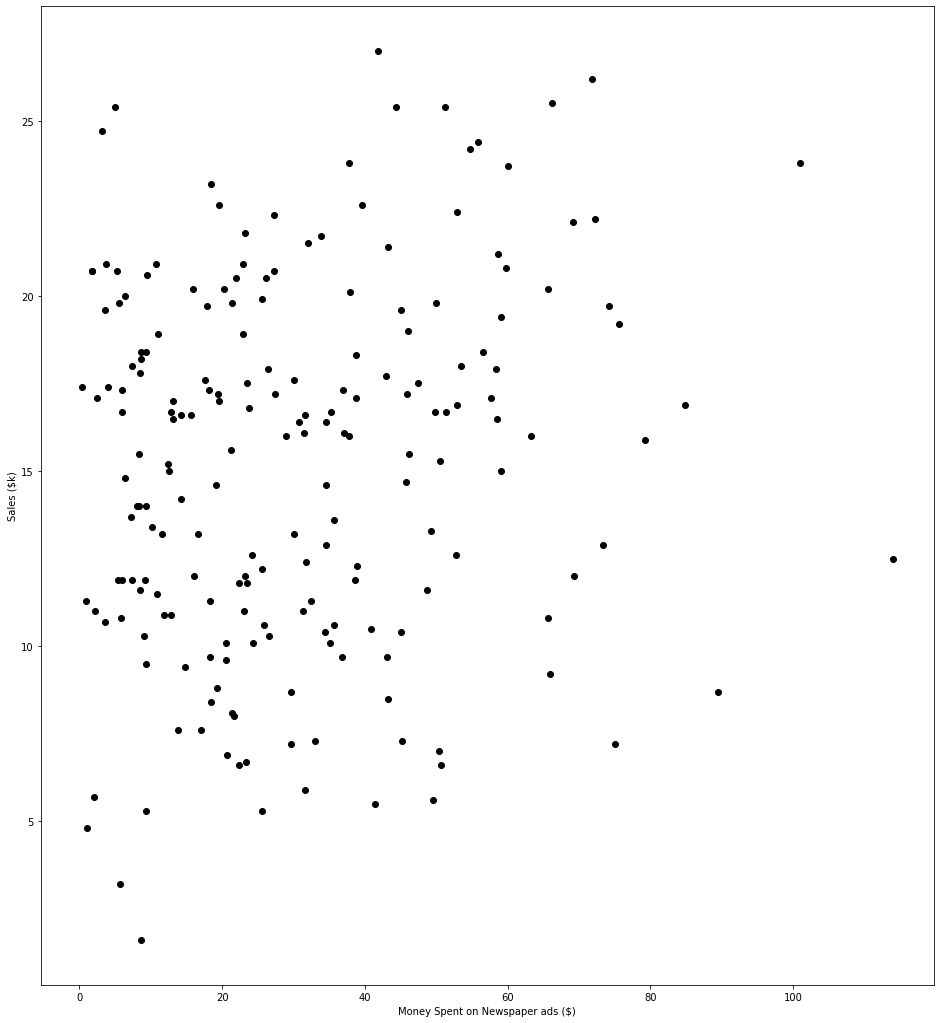

In [4]:
# defining the function to plot the scatter plot for the given feature wrt sales
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

In [5]:
#Plotly graph for Sales vs TV
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Plotly graph for Sales vs Newspaper
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [7]:
#Plotly graph for Sales vs Radio
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

In [8]:
# finding the correlation between the dataset
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split #Splitting into training and test set

In [10]:
x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [11]:
print(xtrain)

[[ 36.9  38.6  65.6]
 [ 31.5  24.6   2.2]
 [142.9  29.3  12.6]
 [209.6  20.6  10.7]
 [215.4  23.6  57.6]
 [102.7  29.6   8.4]
 [  8.6   2.1   1. ]
 [ 16.9  43.7  89.4]
 [125.7  36.9  79.2]
 [104.6   5.7  34.4]
 [109.8  14.3  31.7]
 [229.5  32.3  74.2]
 [253.8  21.3  30. ]
 [184.9  21.   22. ]
 [ 44.7  25.8  20.6]
 [ 62.3  12.6  18.3]
 [292.9  28.3  43.2]
 [172.5  18.1  30.7]
 [202.5  22.3  31.6]
 [  7.3  28.1  41.4]
 [265.2   2.9  43. ]
 [197.6   3.5   5.9]
 [218.5   5.4  27.4]
 [147.3  23.9  19.1]
 [171.3  39.7  37.7]
 [217.7  33.5  59. ]
 [262.7  28.8  15.9]
 [163.5  36.8   7.4]
 [100.4   9.6   3.6]
 [ 76.3  27.5  16. ]
 [184.9  43.9   1.7]
 [134.3   4.9   9.3]
 [273.7  28.9  59.7]
 [296.4  36.3 100.9]
 [ 96.2  14.8  38.9]
 [109.8  47.8  51.4]
 [255.4  26.9   5.5]
 [204.1  32.9  46. ]
 [240.1  16.7  22.9]
 [193.7  35.4  75.6]
 [191.1  28.7  18.2]
 [ 89.7   9.9  35.7]
 [ 43.   25.9  20.5]
 [ 38.2   3.7  13.8]
 [ 13.1   0.4  25.6]
 [239.3  15.5  27.3]
 [ 17.2  45.9  69.3]
 [210.7  29.5

In [12]:
print(ytrain)

[10.8 11.  15.  20.9 17.1 14.   4.8  8.7 15.9 10.4 12.4 19.7 17.6 20.5
 10.1  9.7 21.4 16.4 16.6  5.5 17.7 16.7 17.2 14.6 16.  19.4 20.2 18.
 10.7 12.  20.7 14.  20.8 23.8 12.3 16.7 19.8 19.  20.9 19.2 17.3 10.6
  9.6  7.6  5.3 20.7 12.  18.4  9.5 14.8 17.9 12.6 17.3 11.  14.  16.8
 27.   6.6 22.2 17.1  7.3 11.9 16.4 22.1 11.5 18.4 16.9 16.  17.2 17.1
 22.3  9.7 19.8 20.2 13.7 13.3 20.5 10.3 11.6 18.  22.4  5.3 20.7 22.6
 16.7  6.9 16.5 12.2 11.9 25.5 11.8 18.9 21.7  7.   3.2 17.5 15.3  7.3
 18.4 17.4  6.6 19.8 17.8 13.2 11.3 10.4 15.5 19.9 20.7 15.   5.7 16.7
 24.4 10.1 19.6 21.2 10.1 24.7 11.9 18.9 14.6 11.6 11.9  8.  11.9 20.2
 13.2 20.1 20.  25.4 10.5 17.2 11.3 11.  12.6 10.9 19.6  8.8 14.2 17.
 16.9 17.3 20.9 16.5 10.8 21.5 23.8 10.9 12.9 18.3 16.  25.4 17.5 15.6
 19.7 13.4  5.9  9.4 23.2  7.6]


In [13]:
#Importing the random forest regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=10, random_state=0)

In [14]:
print(regressor.score(xtest, ytest)) #the accuracy of this model

0.9521929049286808


In [15]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(regressor.predict(features))

[22.06]


In [16]:
#Predictions on our test set
y_pred = regressor.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))

[[11.13 11.3 ]
 [ 9.77  8.4 ]
 [11.69 12.  ]
 [25.14 25.4 ]
 [16.66 16.7 ]
 [10.69  8.7 ]
 [ 8.12  7.2 ]
 [18.19 18.2 ]
 [ 8.13  9.2 ]
 [17.27 16.6 ]
 [25.16 24.2 ]
 [11.12 10.6 ]
 [15.24 15.5 ]
 [20.19 20.6 ]
 [12.45 11.8 ]
 [12.3  13.2 ]
 [19.7  17.4 ]
 [ 5.77  1.6 ]
 [14.6  14.7 ]
 [17.36 17.  ]
 [25.2  26.2 ]
 [12.63 10.3 ]
 [16.96 16.1 ]
 [12.06 12.9 ]
 [10.19  8.1 ]
 [14.29 15.2 ]
 [16.5  17.6 ]
 [22.33 22.6 ]
 [16.24 16.6 ]
 [ 7.94  8.5 ]
 [12.54 12.5 ]
 [23.47 23.7 ]
 [19.78 16.1 ]
 [22.5  21.8 ]
 [ 6.11  5.6 ]
 [ 6.83  6.7 ]
 [10.26  9.7 ]
 [17.65 17.9 ]
 [13.03 13.6 ]
 [ 7.07  7.2 ]]
